In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
def linear_regression(filename, learning_rate_w=0.001, learning_rate_b=0.001, max_iterations=10000):
    """
    Вычисляет линейную регрессию из файла.

    Args:
        filename: Имя файла с точками (x, y).
        learning_rate_w: Скорость обучения для w.
        learning_rate_b: Скорость обучения для b.
        max_iterations: Максимальное количество итераций.

    Returns:
        Кортеж (w, b) - найденные значения параметров.
        Возвращает None, если файл не найден или пуст.
    """
    try:
        points = np.loadtxt(filename)
    except FileNotFoundError:
        print(f"Ошибка: файл {filename} не найден.")
        return None
    except ValueError:
      print(f"Ошибка: неверный формат файла {filename}. Ожидается x y.")
      return None


    if len(points) == 0:
        print(f"Ошибка: файл {filename} пуст.")
        return None


    x = points[:, 0]
    y = points[:, 1]
    
    w = 0
    b = 0
    
    for k in range(max_iterations):
        errors_sum = np.sum((w * x + b - y)**2)
        error = errors_sum / len(x)
        
        dEdw = (2 * np.sum((w * x + b - y) * x)) / len(x)
        dEdb = (2 * np.sum(w * x + b - y)) / len(x)

        w -= dEdw * learning_rate_w
        b -= dEdb * learning_rate_b

        if error < 0.01:  # Критерий остановки по значению ошибки
            break
        
        # Уберите этот блок для более быстрого вывода
        # if (k % (max_iterations // 10)) == 0:  
        #     print(f"w: {w}, b: {b}, Error: {error}, Iteration: {k}")
            
    return w, b



if __name__ == "__main__":
    filename = './points00.txt'

    try:
        w, b = linear_regression(filename)
    except Exception as e:
        print(f"Произошла ошибка: {e}")
    else:
        if w is not None:
            print(f"Результаты линейной регрессии:\nw = {w}, b = {b}")

            

Результаты линейной регрессии:
w = -4.999649810047754, b = -3.983068172008021


# С графиком

Результаты линейной регрессии:
w = -4.999649810047755, b = -3.983068172008021


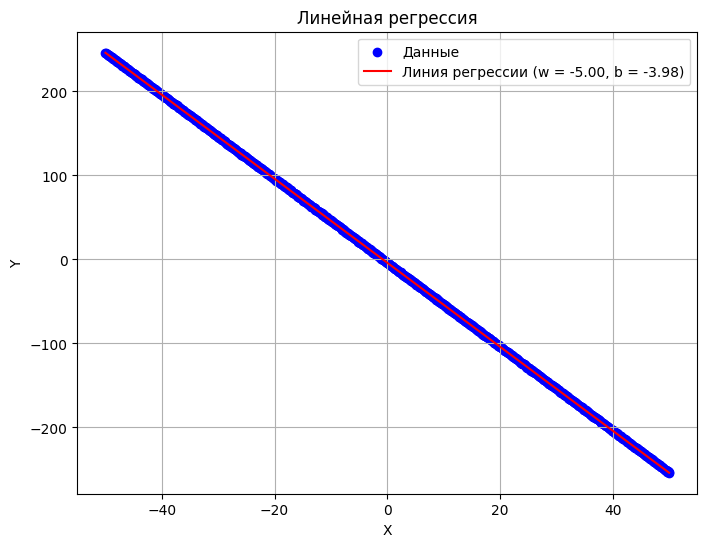

In [6]:
import os
import matplotlib.pyplot as plt

def linear_regression(filename, learning_rate_w=0.001, learning_rate_b=0.001, max_iterations=10000):
    """
    Вычисляет линейную регрессию из файла (txt).

    Args:
        filename: Полный путь к файлу с точками (x, y).
        learning_rate_w: Скорость обучения для w.
        learning_rate_b: Скорость обучения для b.
        max_iterations: Максимальное количество итераций.

    Returns:
        Кортеж (w, b, x, y) - найденные значения параметров и данные.
        Возвращает None, если возникла ошибка при чтении файла или если файл пуст.
    """
    points = []
    try:
        with open(filename, 'r') as file:
            for line in file:
                try:
                  x, y = map(float, line.split())
                  points.append([x, y])
                except ValueError:
                    print(f"Ошибка: неверный формат в строке: {line.strip()}")
                    continue  # Пропускаем строку при ошибке
    except FileNotFoundError:
        print(f"Ошибка: файл {filename} не найден.")
        return None

    if not points:
      print(f"Ошибка: файл {filename} пуст или содержит некорректные данные.")
      return None

    x = [point[0] for point in points]
    y = [point[1] for point in points]

    w = 0
    b = 0

    for k in range(max_iterations):
        errors_sum = sum((w * x[i] + b - y[i]) ** 2 for i in range(len(x)))
        error = errors_sum / len(x)

        dEdw = 2 * sum((w * x[i] + b - y[i]) * x[i] for i in range(len(x))) / len(x)
        dEdb = 2 * sum(w * x[i] + b - y[i] for i in range(len(x))) / len(x)

        w -= dEdw * learning_rate_w
        b -= dEdb * learning_rate_b

        if error < 0.01:
            break
            
    return w, b, x, y

if __name__ == "__main__":
    filename = './points00.txt'

    try:
        w, b, x, y = linear_regression(filename)
    except Exception as e:
        print(f"Произошла ошибка: {e}")
    else:
        if w is not None:
            print(f"Результаты линейной регрессии:\nw = {w}, b = {b}")

            # Теперь x и y доступны для графика!
            plt.figure(figsize=(8, 6))
            plt.scatter(x, y, label='Данные', color='blue')
            x_line = [min(x), max(x)]
            y_line = [w * x_val + b for x_val in x_line]
            plt.plot(x_line, y_line, label=f'Линия регрессии (w = {w:.2f}, b = {b:.2f})', color='red')
            
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.title('Линейная регрессия')
            plt.legend()
            plt.grid(True)
            plt.show()

# Второй вариант

In [7]:
def main():
    w = 0
    b = 0
    cw = 0.001
    cb = 0.001
    with open("points00.txt", "r") as reader:
        points = []
        for line in reader:
            xy = line.split()
            point = [float(xy[0]), float(xy[1])]
            points.append(point)
    n = 10000
    dEdw = 0
    dEdb = 0
    sum = 1
    k = 0
    while k < n and sum > 0.01:
        sum = 0
        for i in range(len(points)):
            dif = points[i][0] * w + b - points[i][1]
            sum += dif * dif
        sum /= len(points)
        for i in range(len(points)):
            dEdbTemp = 2 * (w * points[i][0] + b - points[i][1])
            dEdb += dEdbTemp
            dEdw += dEdbTemp * points[i][0]
        dEdb /= len(points)
        dEdw /= len(points)
        w -= dEdw * cw
        b -= dEdb * cb
        k += 1
    print("Result.")
    print("w: " + str(w) + ";  b: " + str(b))

if __name__ == "__main__":
    main()

Result.
w: -4.999649810047754;  b: -3.9830681721681382
